# **The Notebook contains the code for Building Neural Network with the MNIST data**

Target of architecture: To Achieve 99.4% of val-accuracy using special features such as BatchNormalization, Dropout, data-transforms upon the condition of parameters having 20000.

Description:
The network architecture is built up on involving special features with less than 20K parameters

This network has been made with  16,050  parameters which makes it a lighter model. The architecture has 7 Convolutional layer , 1 Max Pool layer, 3 dropout layers for 1% of neurons, GAP with kernel size (3)

## **Architecture:**

**Conv1 -> Conv2 -> MaxPool -> Conv3 -> Dropout -> Conv4 -> Conv5 -> Dropout -> Conv6 -> Dropout -> Conv7 -> GAP(3)**


The Receptive Field looks out a 30x30 at the end.

EPOCHS: Iterated the dataset for 20 times.

BATCHSIZE : 128

Accuracies are mentioned in the "Results" section and "analysis" is made.

As per my view & visualizations, the model's accuracy is at its best right from first epoch. The validation accuracy has the better results, but at the highest level it has a tiny bit of inconsistent metrics.

In [1]:
!git clone https://github.com/kishkath/MNIST-V0.git

Cloning into 'MNIST-V0'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 5), reused 21 (delta 4), pack-reused 0
Unpacking objects: 100% (22/22), 4.91 KiB | 838.00 KiB/s, done.


In [2]:
%cd /content/MNIST-V0/

/content/MNIST-V0


In [3]:
from utils import allot_device, Load_dataset, Plots, Performance, scores
from model import NetArch,return_summary

In [4]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

In [5]:
 # Setting up the device 
device = allot_device(42)
print(f"{device} is available")

cuda is available


In [6]:
## Loading & Reading the dataset
train_loader,test_loader = Load_dataset(128).get_dataset()
print(len(train_loader),len(test_loader))

100%|██████████| 9912422/9912422 [00:00<00:00, 250302291.63it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 118528076.15it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 134223996.05it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20684613.21it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



469 79


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [7]:
print(len(train_loader),len(test_loader))

469 79


<Figure size 640x480 with 0 Axes>

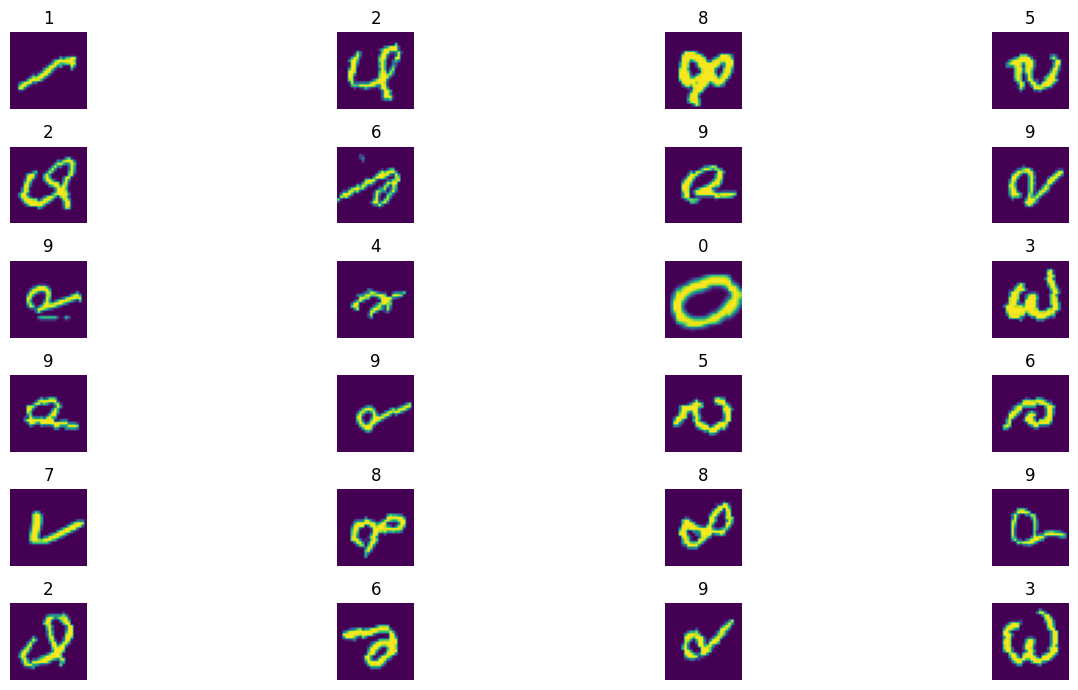

In [8]:
# Plots training images (number divisible by 4) 
Plots(24,train_loader).plot_images()

<Figure size 640x480 with 0 Axes>

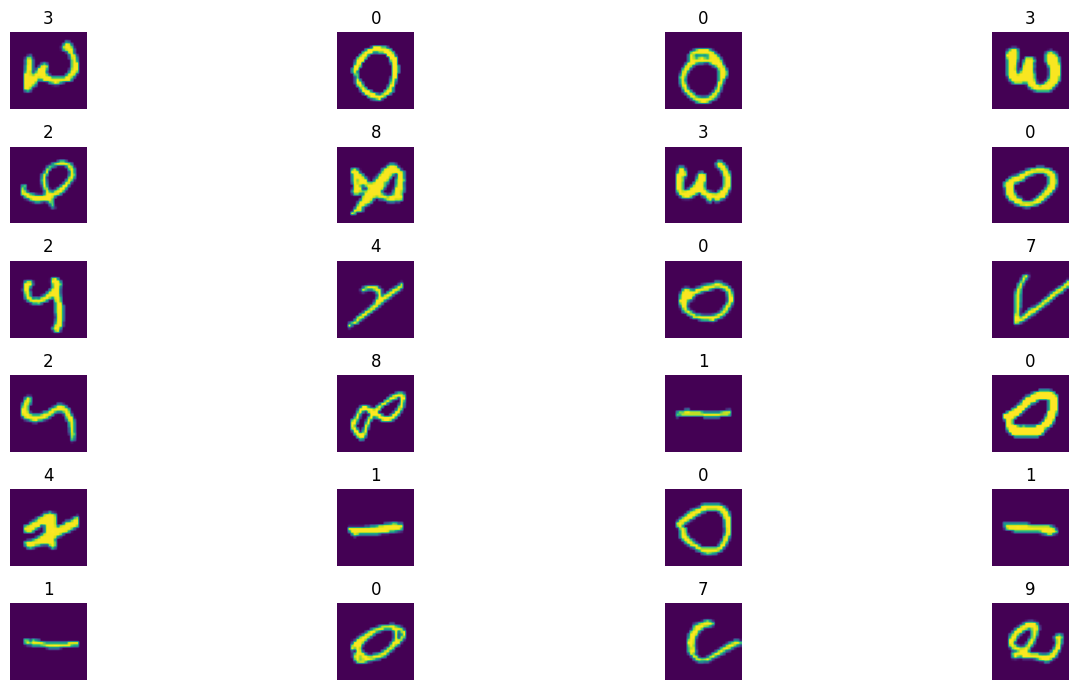

In [9]:
Plots(24,test_loader).plot_images()

In [10]:
### Defining the model
model = NetArch().to(device)

In [11]:
return_summary(device,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]             100
       BatchNorm2d-2           [-1, 10, 28, 28]              20
              ReLU-3           [-1, 10, 28, 28]               0
            Conv2d-4           [-1, 20, 26, 26]           1,820
       BatchNorm2d-5           [-1, 20, 26, 26]              40
              ReLU-6           [-1, 20, 26, 26]               0
         MaxPool2d-7           [-1, 20, 13, 13]               0
            Conv2d-8           [-1, 20, 11, 11]           3,620
       BatchNorm2d-9           [-1, 20, 11, 11]              40
             ReLU-10           [-1, 20, 11, 11]               0
        Dropout2d-11           [-1, 20, 11, 11]               0
           Conv2d-12             [-1, 20, 9, 9]           3,620
      BatchNorm2d-13             [-1, 20, 9, 9]              40
             ReLU-14             [-1, 2

In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20


Adjusting learning rate of group 0 to 1.0000e-02.


In [13]:
perf = Performance(device,model,(train_loader,test_loader),optimizer,criterion)


In [14]:
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  perf.train()
  perf.test()
  scheduler.step()

Epoch 1


Train: Loss=0.1706 Batch_id=468 Accuracy=93.37: 100%|██████████| 469/469 [00:24<00:00, 18.95it/s]


Test set: Average loss: 0.0005, Accuracy: 9874/10000 (98.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1255 Batch_id=468 Accuracy=97.72: 100%|██████████| 469/469 [00:24<00:00, 19.09it/s]


Test set: Average loss: 0.0003, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0704 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:24<00:00, 19.15it/s]


Test set: Average loss: 0.0003, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1614 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:24<00:00, 19.37it/s]


Test set: Average loss: 0.0002, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0516 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:25<00:00, 18.71it/s]


Test set: Average loss: 0.0002, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 6


Train: Loss=0.0974 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:25<00:00, 18.62it/s]


Test set: Average loss: 0.0002, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.1415 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:25<00:00, 18.60it/s]


Test set: Average loss: 0.0002, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.0427 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:25<00:00, 18.68it/s]


Test set: Average loss: 0.0002, Accuracy: 9953/10000 (99.53%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.0280 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:24<00:00, 18.85it/s]


Test set: Average loss: 0.0002, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.0480 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:25<00:00, 18.54it/s]


Test set: Average loss: 0.0002, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 11


Train: Loss=0.0555 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:25<00:00, 18.65it/s]


Test set: Average loss: 0.0002, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 12


Train: Loss=0.0467 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:24<00:00, 18.83it/s]


Test set: Average loss: 0.0002, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=0.0551 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:25<00:00, 18.64it/s]


Test set: Average loss: 0.0002, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.0343 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:25<00:00, 18.59it/s]


Test set: Average loss: 0.0002, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.0159 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:26<00:00, 18.00it/s]


Test set: Average loss: 0.0002, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 16


Train: Loss=0.0232 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:24<00:00, 18.98it/s]


Test set: Average loss: 0.0002, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 17


Train: Loss=0.0150 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:25<00:00, 18.68it/s]


Test set: Average loss: 0.0002, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 18


Train: Loss=0.0436 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:25<00:00, 18.70it/s]


Test set: Average loss: 0.0002, Accuracy: 9952/10000 (99.52%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 19


Train: Loss=0.0134 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:25<00:00, 18.55it/s]


Test set: Average loss: 0.0002, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 20


Train: Loss=0.0292 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:25<00:00, 18.41it/s]


Test set: Average loss: 0.0002, Accuracy: 9954/10000 (99.54%)

Adjusting learning rate of group 0 to 1.0000e-06.


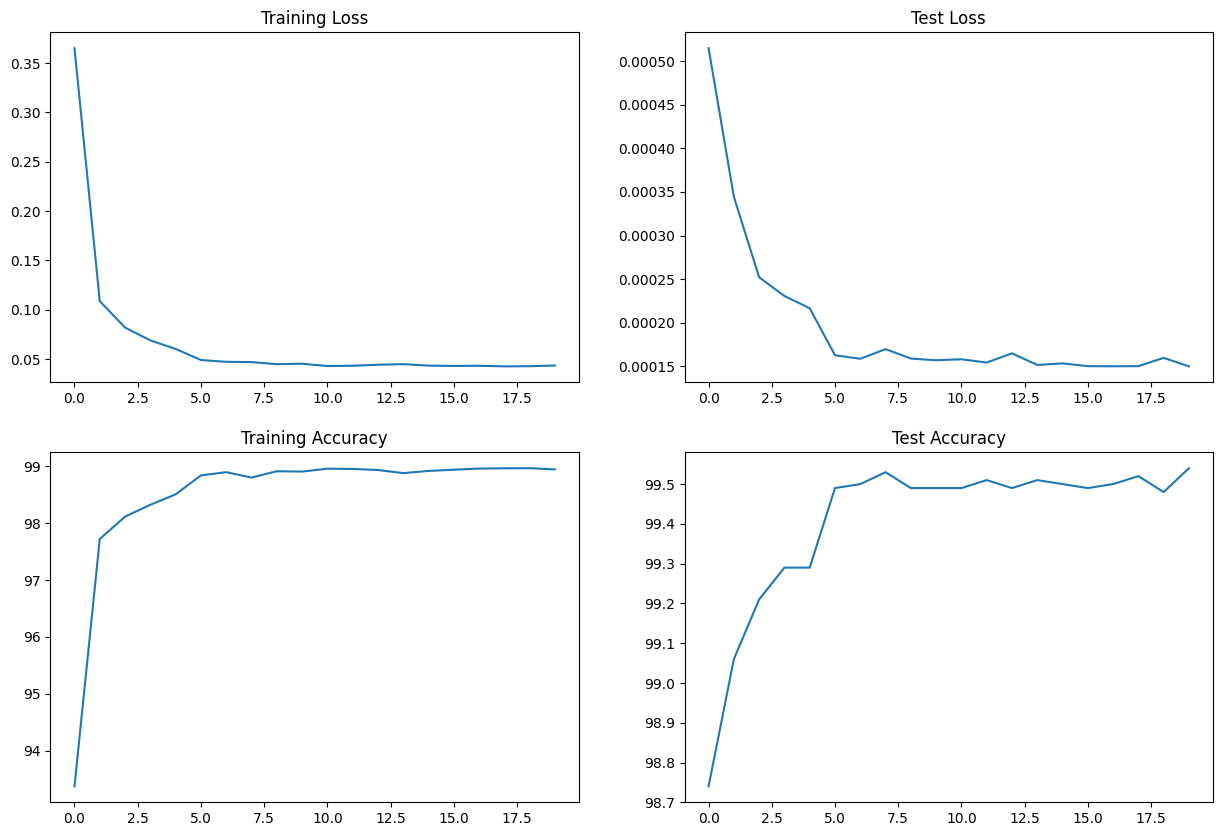

In [15]:
metrics = scores()
Plots(None,None,metrics).plot_metrics()

In [16]:
print("Achieved desired val-accuracy!")

Achieved desired val-accuracy!
